In [1]:
# add xkcd style

In [4]:
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pandas import datetime
%matplotlib inline

In [5]:
fname = 'data.xlsx'

In [6]:
wb = load_workbook(fname)

In [7]:
sheet_name = wb.get_sheet_names()[0]

In [8]:
data = pd.DataFrame(wb[sheet_name].values)

In [9]:
data

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,2017-02-01 00:00:00,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Ноль,=SUM(AA2:AL2),None,None,None,None,None,None,None,None,...,=J2-I2,=L2-K2,=N2-M2,=P2-O2,=R2-Q2,=T2-S2,=V2-U2,=X2-W2,=Z2-Y2,None
2,Один,=SUM(AA3:AL3),None,None,None,None,None,None,None,None,...,=J3-I3,=L3-K3,=N3-M3,=P3-O3,=R3-Q3,=T3-S3,=V3-U3,=X3-W3,=Z3-Y3,None
3,Два,=SUM(AA4:AL4),None,None,None,None,None,None,None,None,...,=J4-I4,=L4-K4,=N4-M4,=P4-O4,=R4-Q4,=T4-S4,=V4-U4,=X4-W4,=Z4-Y4,None
4,Три,=SUM(AA5:AL5),None,None,None,None,None,None,None,None,...,=J5-I5,=L5-K5,=N5-M5,=P5-O5,=R5-Q5,=T5-S5,=V5-U5,=X5-W5,=Z5-Y5,None
5,Четыре,=SUM(AA6:AL6),None,None,None,None,None,None,None,None,...,=J6-I6,=L6-K6,=N6-M6,=P6-O6,=R6-Q6,=T6-S6,=V6-U6,=X6-W6,=Z6-Y6,None
6,Пять,=SUM(AA7:AL7),None,None,None,None,None,None,None,None,...,=J7-I7,=L7-K7,=N7-M7,=P7-O7,=R7-Q7,=T7-S7,=V7-U7,=X7-W7,=Z7-Y7,None
7,Шесть,=SUM(AA8:AL8),None,None,None,None,None,None,None,None,...,=J8-I8,=L8-K8,=N8-M8,=P8-O8,=R8-Q8,=T8-S8,=V8-U8,=X8-W8,=Z8-Y8,None
8,Семь,=SUM(AA9:AL9),None,None,None,None,None,None,None,None,...,=J9-I9,=L9-K9,=N9-M9,=P9-O9,=R9-Q9,=T9-S9,=V9-U9,=X9-W9,=Z9-Y9,None
9,Восемь,=SUM(AA10:AL10),None,None,None,None,None,None,None,None,...,=J10-I10,=L10-K10,=N10-M10,=P10-O10,=R10-Q10,=T10-S10,=V10-U10,=X10-W10,=Z10-Y10,None


In [10]:
null_idx = 1
null_str = data.loc[null_idx][0]

In [11]:
days = np.where(data[0] == null_str)
print(days)

(array([  1,  15,  29,  43,  57,  71,  85,  99, 113, 127, 141, 155, 169,
       183, 197, 211, 225, 239, 253, 267, 281, 295, 309, 323, 337, 351,
       365, 379, 393, 407, 421], dtype=int64),)


In [12]:
colormap = plt.get_cmap('jet')
mycolors = [colormap(i) for i in np.linspace(0, 1, 11)]
# mycolors = [(mycolors[i][0], mycolors[i][1], mycolors[i][2], 0.6) for i in xrange(len(mycolors))]
mycolormap = matplotlib.colors.ListedColormap(mycolors)

In [13]:
# # fig = plt.figure(figsize=(8, 2))
# # ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
# fig, axes = plt.subplots(1, 1)
# fig.set_size_inches((8, 0.5))
# cbase = matplotlib.colorbar.ColorbarBase(axes, cmap = mycolormap,
#                                          norm = matplotlib.colors.Normalize(vmin = 0, vmax = 10),
#                                          orientation = 'horizontal')
# plt.show()

In [14]:
init_date = data.iloc[[days[0][0] - 1]][0].values[0].date()

In [15]:
init_date

datetime.date(2017, 2, 1)

In [30]:
for daysi, dayi in enumerate(days[0]):
# for dayi in [days[0][16]]: # debug
    dtime = data.iloc[[dayi - 1]][0].values[0]
#     if type(dtime) == str:
#         dtime = datetime(int(dtime[6:10]), int(dtime[11]), int(dtime[13]))
#     date = dtime.date()
    date = init_date + pd.Timedelta(days = daysi)

    fig, axes = plt.subplots(1, 1)
    fig.set_size_inches((12, 5))
#     axes.get_yaxis().set_visible(False)
    plt.xlim(0, 24)
    plt.ylim(0, 11)
#     plt.xlabel('hour')
#     plt.ylabel('activity')
    plt.xticks(np.arange(0, 25))
#     plt.yticks(np.arange(0, 12))
    axes.tick_params(labeltop = False, labelright = True)
    axes.yaxis.set(ticks = np.arange(0.5, 11), ticklabels = np.arange(0, 11))
    fig.suptitle(date)

    for act in range(11):
        rowi = dayi + act
        row = data.iloc[[rowi]]
        coli = 2
        while row[coli].values[0] is not None:
            if type(row[coli].values[0]) == pd.datetime:
                start = row[coli].values[0].time()
            else:
                start = row[coli].values[0]
            if type(row[coli + 1].values[0]) == pd.datetime:
                end = row[coli + 1].values[0].time()
            else:
                end = row[coli + 1].values[0]
            intensity = act + 1
    #         print(start, end, intensity)

            start_hour = start.hour + float(start.minute) / 24
            end_hour = end.hour + float(end.minute) / 24
            color = list(colormap(float(act) / 11))
#             color[3] = 0.6
            plt.broken_barh([(start_hour, end_hour - start_hour)], (act, 1),
                                   cmap = colormap,
#                                        facecolor = color)
                                   facecolor = color, edgecolor = 'white')
            coli += 2

    plt.savefig(str(date) + '.png', bbox_inches='tight')

# the new cumulative graph

In [22]:
from tqdm import tqdm

14it [00:05,  2.65it/s]


KeyboardInterrupt: 

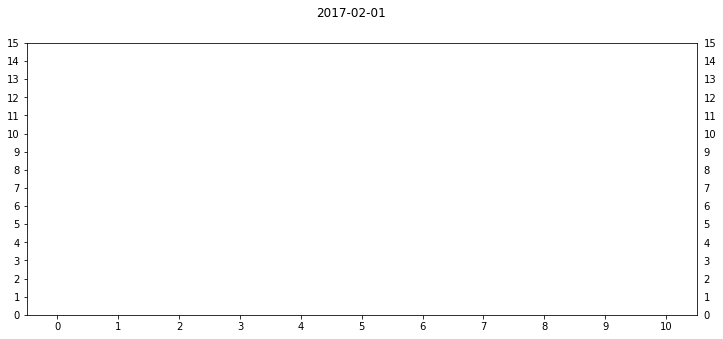

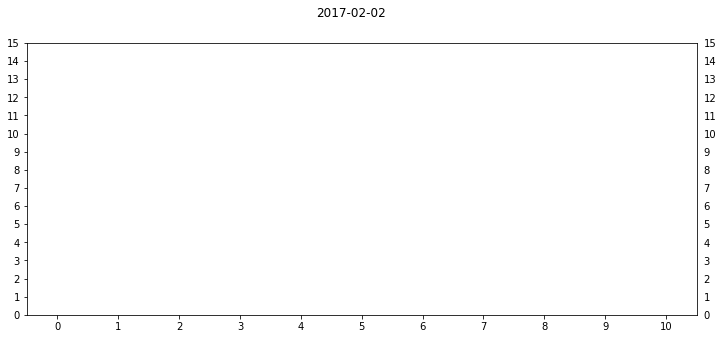

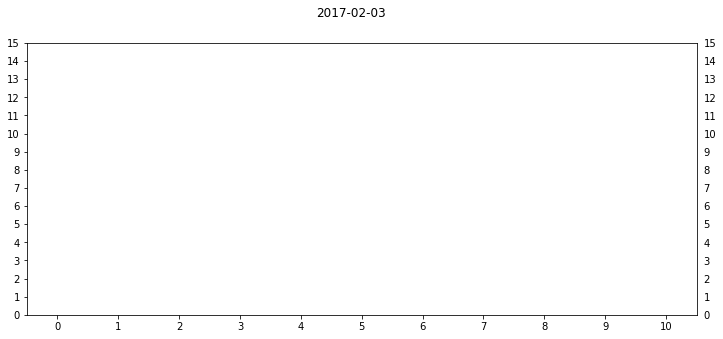

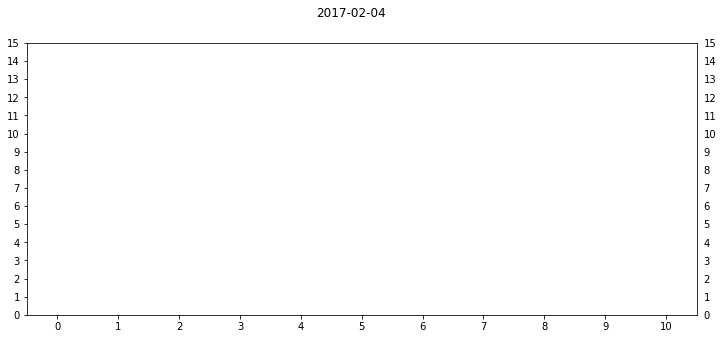

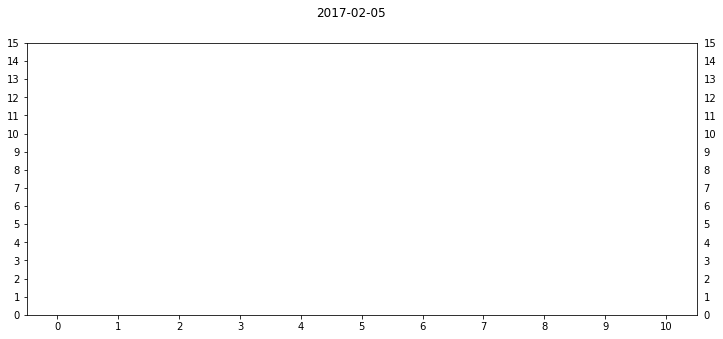

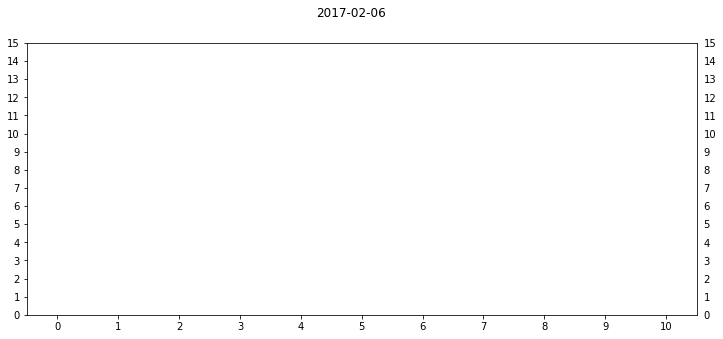

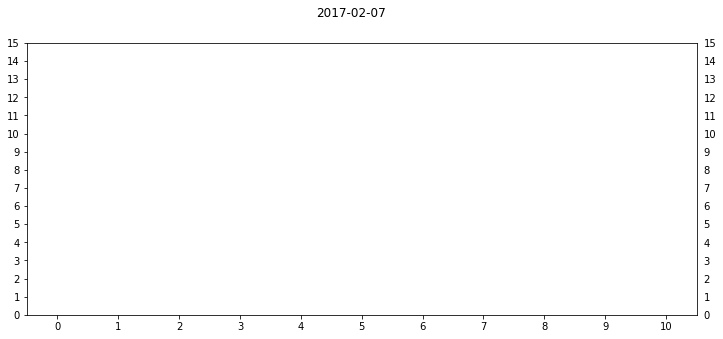

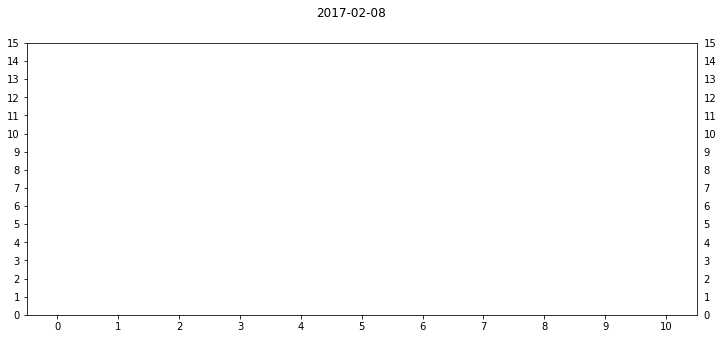

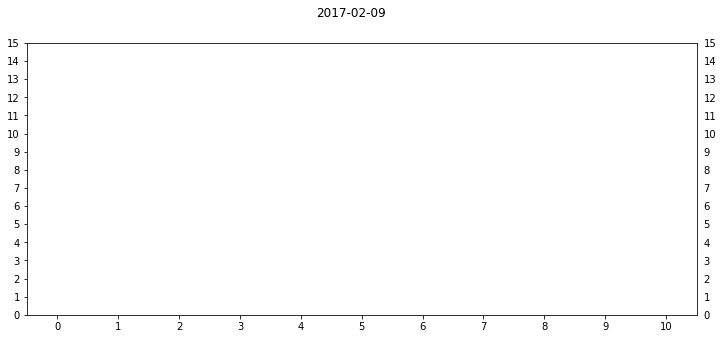

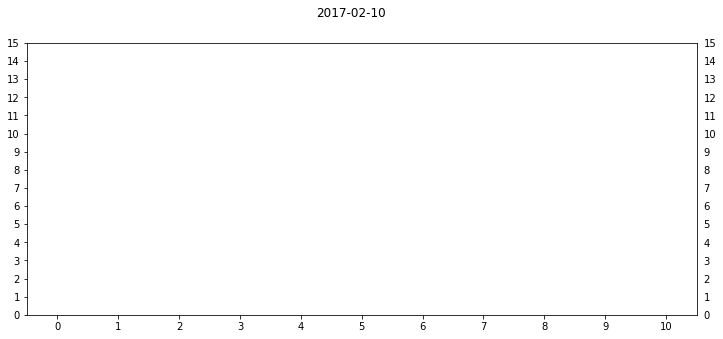

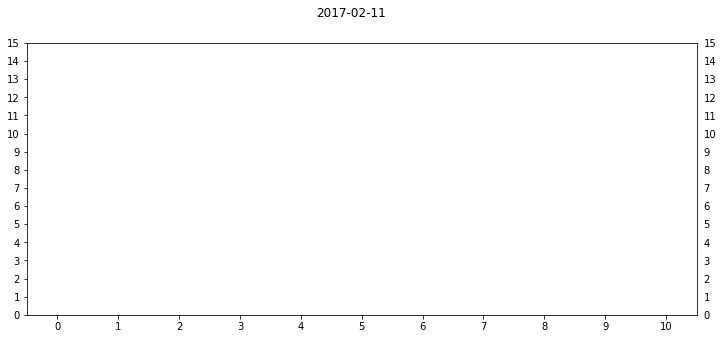

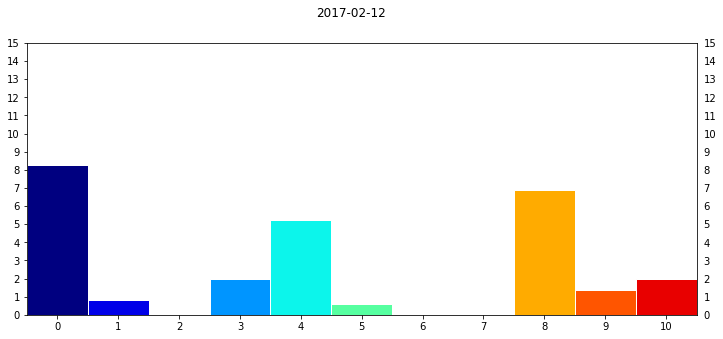

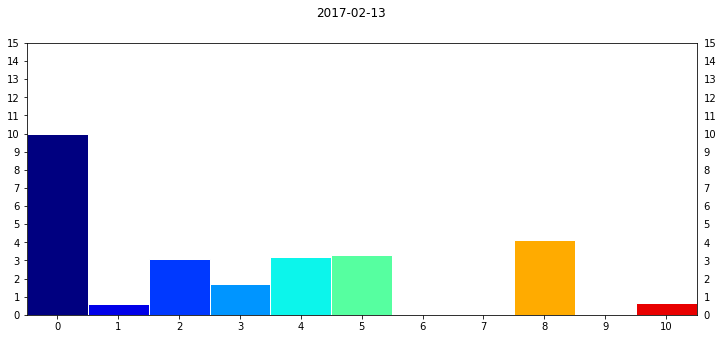

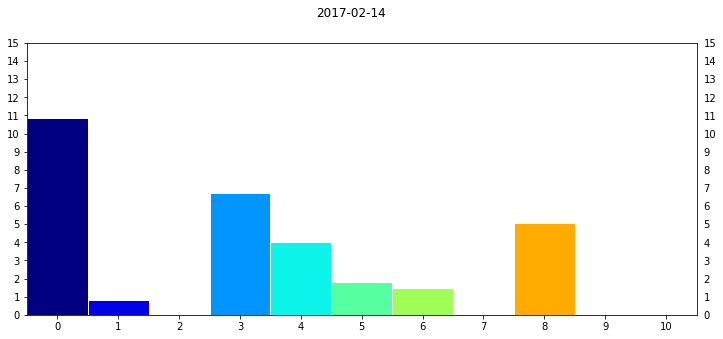

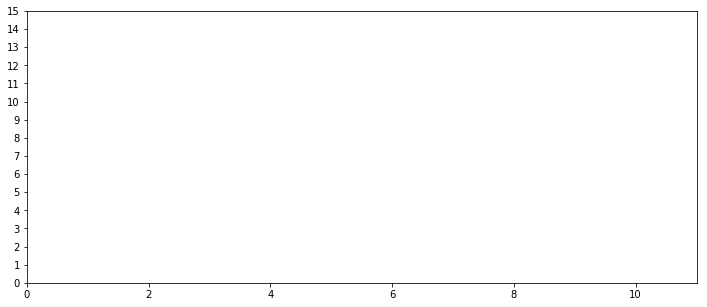

In [27]:
# with plt.xkcd():
for daysi, dayi in tqdm(enumerate(days[0])):
# for dayi in [days[0][16]]: # debug
    dtime = data.iloc[[dayi - 1]][0].values[0]
#     if type(dtime) == str:
#         dtime = datetime(int(dtime[6:10]), int(dtime[11]), int(dtime[13]))
#     date = dtime.date()
    date = init_date + pd.Timedelta(days = daysi)

    fig, axes = plt.subplots(1, 1)
    fig.set_size_inches((12, 5))
#     axes.get_yaxis().set_visible(False)
    plt.xlim(0, 11)
    plt.ylim(0, 15)
#     plt.xlabel('hour')
#     plt.ylabel('activity')
    plt.yticks(np.arange(0, 16))
#     plt.yticks(np.arange(0, 12))
    axes.tick_params(labeltop = False, labelright = True)
    axes.xaxis.set(ticks = np.arange(0.5, 11), ticklabels = np.arange(0, 11))
    fig.suptitle(date)

    for act in range(11):
        rowi = dayi + act
        row = data.iloc[[rowi]]
        coli = 2
        duration_total = 0
        while row[coli].values[0] is not None:
            if type(row[coli].values[0]) == pd.datetime:
                start = row[coli].values[0].time()
            else:
                start = row[coli].values[0]
            if type(row[coli + 1].values[0]) == pd.datetime:
                end = row[coli + 1].values[0].time()
            else:
                end = row[coli + 1].values[0]
            intensity = act + 1
    #         print(start, end, intensity)

            start_hour = start.hour + float(start.minute) / 24
            end_hour = end.hour + float(end.minute) / 24
            duration_cur = end_hour - start_hour
            duration_total += duration_cur
            
            coli += 2
            
        color = list(colormap(float(act) / 11))
#             color[3] = 0.6
        plt.broken_barh([(act, 1)], (0, duration_total),
                               cmap = colormap,
#                                        facecolor = color)
                               facecolor = color, edgecolor = 'white')

    plt.savefig(str(date) + '_sums.png', bbox_inches='tight')